In [1]:
#importing Libraries
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
#Defining file path
file_to_load = 'Resources/clean_data.csv'
data = pd.read_csv(file_to_load)

In [3]:
#Getting the columns needed for the analysis
cleanedData = data.loc[:, ['Reported_Date', 'Description']]

In [4]:
#Converting reported date field to type datetime
cleanedData['Reported_Date'] = pd.to_datetime(cleanedData['Reported_Date'], errors='coerce')

# Total Number of Crimes by Month

In [5]:
#Getting the total number of crimes that took place in each month,
#got the code from https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas
totalByMonth = cleanedData.groupby(cleanedData['Reported_Date'].dt.strftime('%B'))['Reported_Date'].count()
totalByMonth

Reported_Date
April        10418
August       11746
December      9417
February      8877
January      10191
July         11489
June         11487
March        10796
May          11693
November      9955
October      11990
September    10879
Name: Reported_Date, dtype: int64

In [6]:
#Converting the series to a dataframe to make user friendly to work with
totalByMonth_df = pd.DataFrame(totalByMonth)

In [7]:
#sorting the dataframe to list the results in sorted manner,
#got the code from https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
         'November', 'December']
totalByMonth_df.index = pd.CategoricalIndex(totalByMonth_df.index, categories=months, ordered=True)
totalByMonth_df = totalByMonth_df.sort_index()

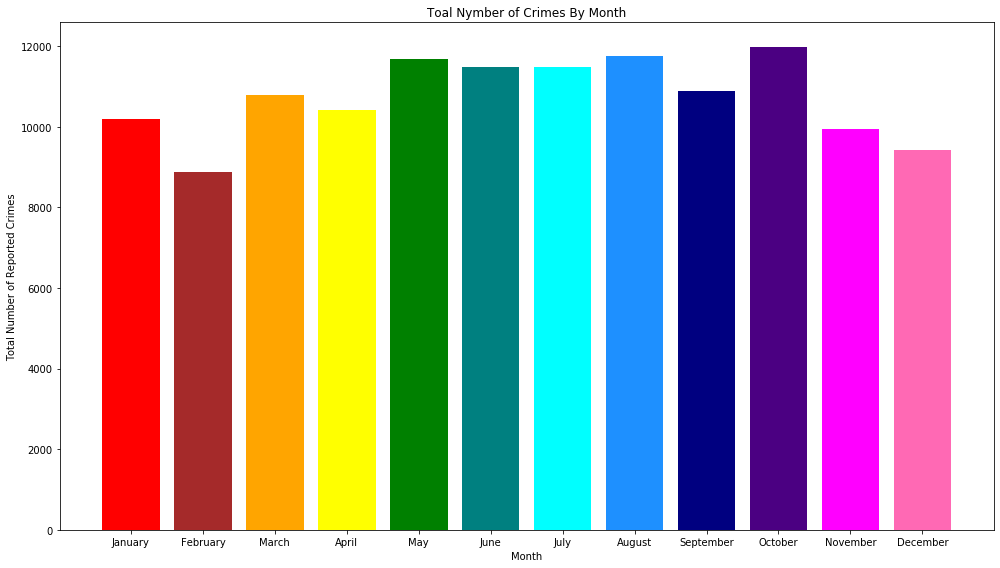

In [8]:
#Creating the plot to represent the data
colors =['red', 'brown', 'orange', 'yellow', 'green', 'teal', 'cyan', 'dodgerblue', 'navy', 'indigo', 'magenta','hotpink']
fig, ax = plt.subplots(figsize=(14,8))
totalCrimes = plt.bar(x = totalByMonth_df.index, height= totalByMonth_df['Reported_Date'], color=colors)
plt.title("Toal Nymber of Crimes By Month")
plt.xlabel('Month')
plt.ylabel('Total Number of Reported Crimes')
plt.tight_layout()
plt.show()

# Types of Crimes by Month

In [9]:
copy = cleanedData
copy['Reported_Date'] = pd.to_datetime(copy['Reported_Date'], errors='coerce')
copy['Month'] =  copy['Reported_Date'].dt.strftime('%B')
copy

,Reported_Date,Description,Month
0,2018-09-02,Burglary - Residence,September
1,2018-01-31,Forgery,January
2,2018-01-30,Sex Off Fondle - mol,January
3,2018-01-30,Burglary - Residence,January
4,2018-12-08,Property Damage,December
...,...,...,...
128933,2018-12-23,HOMICIDE/Non Neglige,December
128934,2018-12-27,Stealing Shoplifting,December
128935,2018-12-29,Burglary - Residence,December
128936,2018-12-25,Non Agg Assault Dome,December


In [15]:
typesofCrime = cleanedData.groupby(['Month','Description'])['Reported_Date'].count()
typesofCrime

Month      Description         
April      Agg Assault               4
           Agg Assault - Domest    238
           Agg Assault - Drive-     52
           Aggravated Assault (    594
           Armed Robbery           193
                                  ... 
September  Trespassing             313
           Violation Ex Parte O     36
           Violation Full Order     68
           Weapons Law Violatio     74
           Wire Fraud               24
Name: Reported_Date, Length: 923, dtype: int64

In [16]:
type(typesofCrime)

pandas.core.series.Series

In [24]:
crime = pd.DataFrame(typesofCrime).reset_index()
crime

,Month,Description,Reported_Date
0,April,Agg Assault,4
1,April,Agg Assault - Domest,238
2,April,Agg Assault - Drive-,52
3,April,Aggravated Assault (,594
4,April,Armed Robbery,193
...,...,...,...
918,September,Trespassing,313
919,September,Violation Ex Parte O,36
920,September,Violation Full Order,68
921,September,Weapons Law Violatio,74


In [26]:
crime = crime.pivot(index='Month', columns='Description', values='Reported_Date')
crime

Description,AGG ASSAULT,Accidental Drug Over,Agg Assault,Agg Assault - Domest,Agg Assault - Drive-,Aggravated Assault,Aggravated Assault (,Animal Bite - Dog,Animal Cruelty,Armed Robbery,...,`,agg assault,black mail,forgery,misc,misc violation,non aggravated assau,property damage,stealing,stealing from buildi
Month,,,,,,,,,,,,,,,,,,,,,
April,NaN,NaN,4.0,238.0,52.0,NaN,594.0,NaN,NaN,193.0,...,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
August,NaN,3.0,NaN,203.0,62.0,NaN,651.0,NaN,NaN,386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN
December,NaN,NaN,NaN,224.0,39.0,NaN,478.0,NaN,NaN,248.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,NaN,NaN,NaN,210.0,28.0,NaN,379.0,NaN,NaN,183.0,...,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN
January,NaN,NaN,NaN,188.0,75.0,NaN,576.0,NaN,2.0,376.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
July,NaN,NaN,NaN,288.0,37.0,NaN,626.0,NaN,NaN,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
June,2.0,NaN,NaN,281.0,47.0,NaN,742.0,1.0,5.0,233.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,272.0,83.0,NaN,496.0,NaN,1.0,274.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
May,NaN,NaN,4.0,310.0,39.0,3.0,591.0,NaN,NaN,221.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
crimeByMonth = crime.plot(kind='bar')